# Import library

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Add data with keras

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

# Visualise images data

In [ ]:
# xem thu du lieu
import matplotlib.pyplot as plt
from PIL import Image

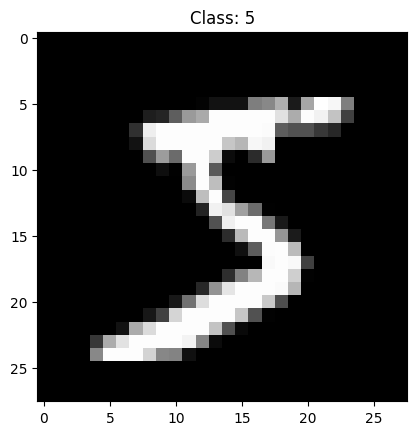

In [ ]:
img = Image.fromarray(X_train[0])
plt.imshow(img, cmap="gray")
plt.title(f"Class: {y_train[0]}")
plt.show()

# Convert data

In [ ]:
# 0...255 -> 0...1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

- `n` số hình (60000)
- `w` chiều rộng (28)
- `h` chiều cao (28)
- `d` direction (trắng đen -> d=1, rgb color -> d=3)

In [ ]:
# them chieu direction
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

- `n` số hình (60000)
- `class` số lớp (bao nhiêu loại khác nhau?)

In [ ]:
my_classes = 10 #0->9
y_train = keras.utils.to_categorical(y_train, my_classes)
y_test = keras.utils.to_categorical(y_test, my_classes)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

# Train

In [ ]:
input_shape = [28, 28, 1]
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3)), #them 1 layer de hoc nhieu hon (tang do phuc tap)
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(), #flatten thanh list 1 chieu
    keras.layers.Dense(my_classes, activation="softmax") #phan loai
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#huan luyen
batch_size = 128 #số ảnh đc xử lí mỗi lần model cập nhật
epochs = 5 #số lần lặp qua toàn bộ dữ liệu huấn luyện
validation_split = 0.1

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9180 - loss: 0.2981 - val_accuracy: 0.9738 - val_loss: 0.0952
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9742 - loss: 0.0844 - val_accuracy: 0.9835 - val_loss: 0.0631
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9809 - loss: 0.0611 - val_accuracy: 0.9835 - val_loss: 0.0607
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9845 - loss: 0.0509 - val_accuracy: 0.9817 - val_loss: 0.0664
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9862 - loss: 0.0447 - val_accuracy: 0.9845 - val_loss: 0.0585


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9862 - loss: 0.0444
Test loss: 0.04437191039323807
Test accuracy: 0.9861999750137329


# Predict

In [ ]:
test_img = X_test[0]
img = Image.fromarray((test_img.squeeze() * 255.astype('uint8')))
plt.imshow(img, cmap='gray')
plt.title(f"True class = {y_test[0]}")
plt.show()

TypeError: Cannot handle this data type: (1, 1, 1), <f4

Vì layer Dense ở cuối có 10 units nên kết quả của `predict` cũng trả về một numpy array có 10 giá trị, mỗi giá trị là tỉ lệ mà hình thuộc lớp tương ứng.
> Ví dụ: Mô hình phân loại 4 lớp có kết quả predict là `[0.1, 0.2, 0.7, 0.0]` nghĩa là hình có 10% thuộc lớp thứ nhất, 20% thuộc lớp thứ hai, 70% thuộc lớp thứ ba và 0% thuộc lớp cuối cùng.

> Lưu ý: Tổng tất cả các tỉ lệ của mảng kết quả luôn bằng 1, tương ứng với 100%.

In [ ]:
test_img = np.expand_dims(test_img, 0)
preds = model.predict(test_img)
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[1.1864723e-09, 1.2117012e-07, 1.4427902e-06, 3.0207284e-06,
        2.4675361e-11, 7.2729150e-10, 1.7773809e-15, 9.9999511e-01,
        4.1805901e-09, 2.9734412e-07]], dtype=float32)

In [ ]:
test_pred = np.argmax(preds)
print(f"Predicted class = {test_pred}")

Predicted class = 7
